# Create a coin

In [1]:
import numpy as np
def flip_coin(times=1000, bias=0.5):
    tosses  = list(np.random.binomial(1, bias, times))
    mapping = {0:"tails", 1:"heads"}
    tosses  = np.vectorize(mapping.get)(tosses)
    return list(tosses)

# MLE Estimates

In [2]:
from collections import Counter

def mle_estimate(total_heads, total_tails):
    return total_heads/(total_heads+total_tails)


def sequential_mle_estimates(tosses):
    estimates = []
    total_heads = 0
    total_tails = 0
    for i in range(len(tosses)):
        if tosses[i]=='heads':
            total_heads+=1
        else:
            total_tails+=1
        estimates.append(mle_estimate(total_heads, total_tails))
    return estimates

In [3]:
theta              = 0.6
total_tosses       = 7000 

coin_flips         = flip_coin(total_tosses, theta)
mle_estimates      = sequential_mle_estimates(coin_flips)

# Plot MLE Estimates

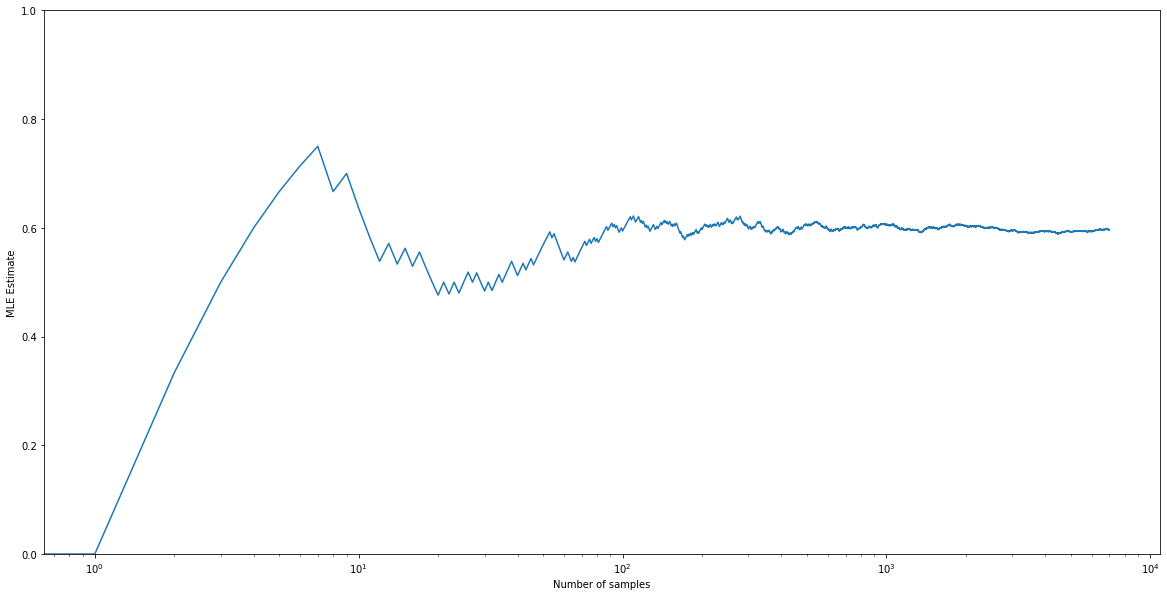

In [5]:
import matplotlib
import matplotlib.pyplot as plt

def plot_estimates(estimates_all_exp, y_name = "Estimated theta"):
    matplotlib.rc('figure', figsize=(20, 10))
    plt.ylim(top=1)
    plt.ylim(bottom=0)
    plt.xlabel("Number of samples")
    plt.ylabel(y_name)
    plt.xscale("log")
    for each_exp_estimates in estimates_all_exp:
        plt.plot(each_exp_estimates)
    plt.show()    
plot_estimates([mle_estimates], "MLE Estimate")

# Do multiple MLE experiments and plots

estimates for all the experiments are available


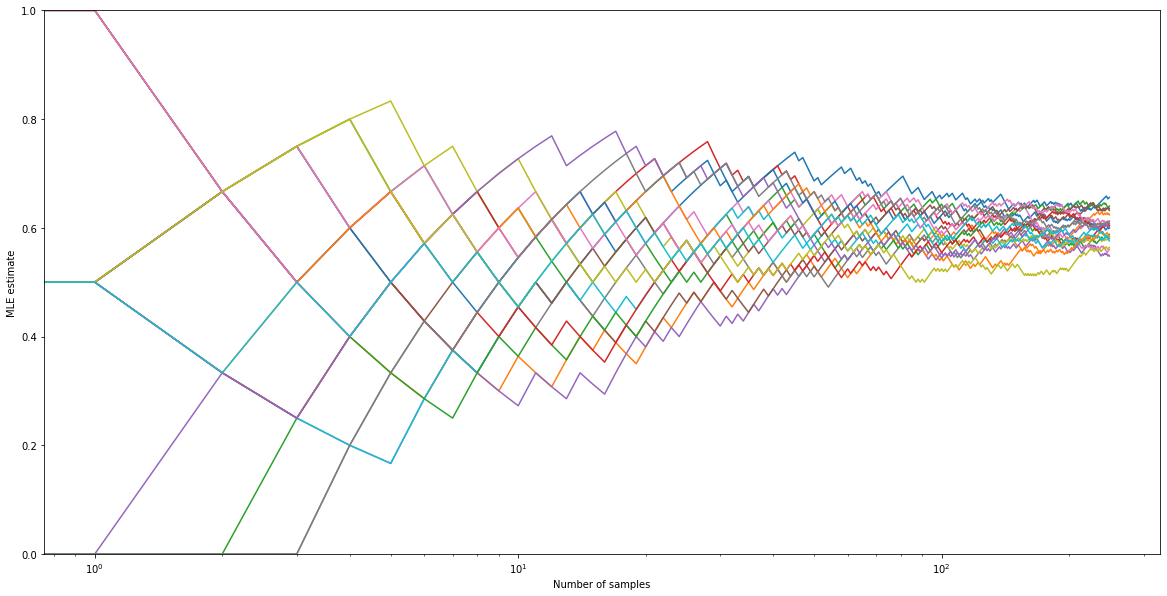

In [6]:
total_experiments              = 20
every_experiment_estimates     = [] 
theta                          = 0.6 
total_tosses                   = 250 
for exp_number in range(total_experiments):
    coin_flips         = flip_coin(total_tosses, theta)
    mle_estimates      = sequential_mle_estimates(coin_flips)
    every_experiment_estimates.append(mle_estimates)
print("estimates for all the experiments are available")    
plot_estimates(every_experiment_estimates, "MLE estimate")

# MAP estimates

In [7]:
def give_prior_belief(hallucinated_heads, hallucinated_tails):
    total = hallucinated_heads+hallucinated_tails
    if total>0:
        print("Prior belief of P(heads) is ", hallucinated_heads/(hallucinated_heads+hallucinated_tails))
    else:
        print("uninformed prior")
    return hallucinated_heads+1, hallucinated_tails+1

def map_estimate(total_heads, total_tails, a, b):
    numerator   = total_heads + a-1
    denominator = total_heads + total_tails + a + b - 2
    return numerator/denominator



def sequential_map_estimates(tosses, a, b):
    estimates   = []
    total_heads = 0
    total_tails = 0
    for i in range(len(tosses)):
        if tosses[i]=='heads':
            total_heads+=1
        else:
            total_tails+=1
        estimates.append(map_estimate(total_heads, total_tails, a, b))
    return estimates

In [10]:
hallucinated_heads = 60
hallucinated_tails = 40
theta              = 0.6
total_tosses       = 7000 
a, b               = give_prior_belief(hallucinated_heads, hallucinated_tails)
coin_flips         = flip_coin(total_tosses, theta)
map_estimates      = sequential_map_estimates(coin_flips, a, b)

Prior belief of P(heads) is  0.6


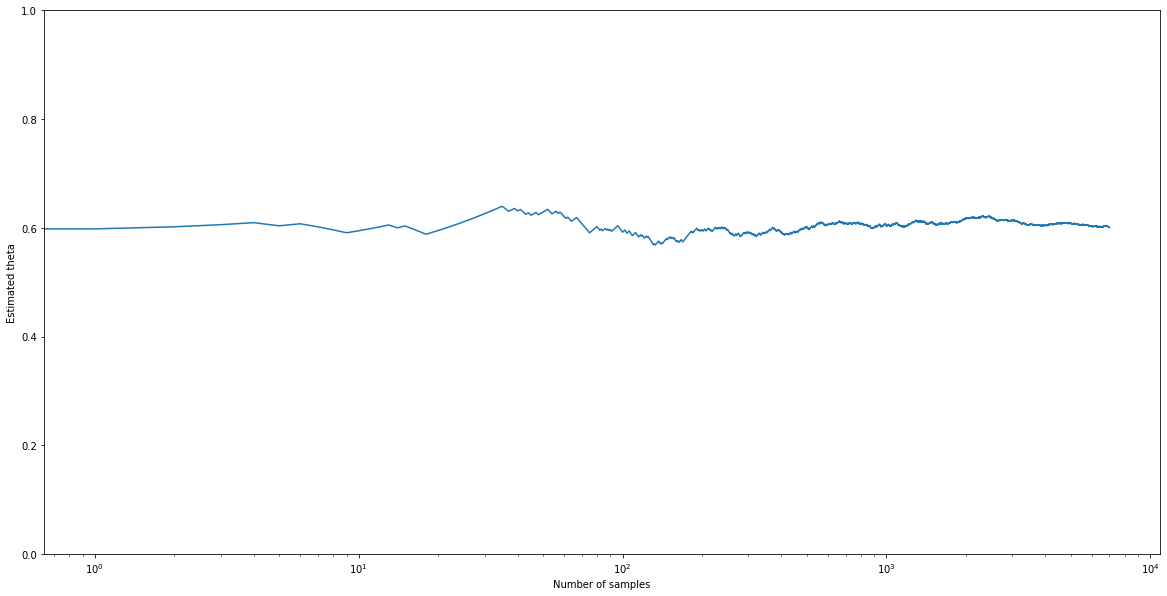

In [11]:
plot_estimates([map_estimates])

# Do multiple MAP estimates

Prior belief of P(heads) is  0.6
estimates for all the experiments are available


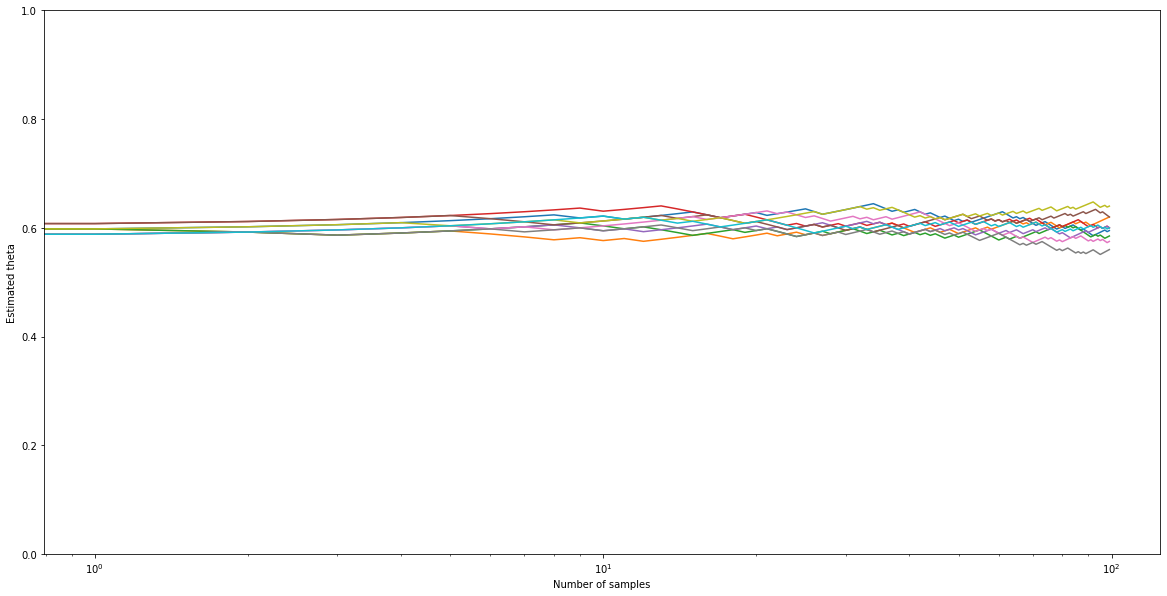

In [12]:
total_experiments              = 10
theta                          = 0.6
total_tosses                   = 100 

every_experiment_estimates     = [] 
hallucinated_heads             = 60
hallucinated_tails             = 40
a, b                           = give_prior_belief(hallucinated_heads, hallucinated_tails)

for exp_number in range(1, total_experiments+1):
    coin_flips         = flip_coin(total_tosses, theta)
    mle_estimates      = sequential_map_estimates(coin_flips, a, b)
    every_experiment_estimates.append(mle_estimates)
print("estimates for all the experiments are available")   
plot_estimates(every_experiment_estimates)

# MLE vs. MAP estimate

In [16]:
from scipy.stats import beta

def plot_my_estimates(estimates_all_exp, ax):
    for each_exp_estimates in estimates_all_exp:
        ax.plot(each_exp_estimates)


def plot_all_estimates(mle_estimates, map_estimates, a, b):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    beta_dist            = beta(a, b)
    ax1.set_title("Prior Belief (alpha="+str(a)+", beta="+str(b)+")")
    ax1.set_xlim(0, 1)
    ax1.set_xlabel("theta")
#     ax1.set_ylim(0, 3)
    x = np.linspace(0, 1, 1000)
    ax1.plot(x, beta_dist.pdf(x))

    ax2.set_title("MLE estimate")
    ax2.set_ylim(0, 1)
    ax2.set_xscale("log")
    ax2.set_xlabel("Number of samples")
    ax2.set_ylabel("theta_estimated")
    plot_my_estimates(mle_estimates, ax2)
    
    
    ax3.set_title("MAP estimate")
    ax3.set_xscale("log")
    ax3.set_ylim(0, 1)
    ax3.set_xlabel("Number of samples")
    ax3.set_ylabel("theta_estimated")
    plot_my_estimates(map_estimates, ax3)
    
    
def simulate_experiment(theta, total_experiments, total_tosses, hallucinated_heads, hallucinated_tails):
    mle_experiment_estimates       = []
    map_experiment_estimates       = []
    a, b                           = give_prior_belief(hallucinated_heads, hallucinated_tails)
    for exp_number in range(1, total_experiments+1):
        coin_flips         = flip_coin(total_tosses, theta)
        mle_estimates      = sequential_mle_estimates(coin_flips)
        map_estimates      = sequential_map_estimates(coin_flips, a, b)
        mle_experiment_estimates.append(mle_estimates)
        map_experiment_estimates.append(map_estimates)
    plot_all_estimates(mle_experiment_estimates, map_experiment_estimates, a, b)

# Uninformed Prior Belief: No prior belief

uninformed prior


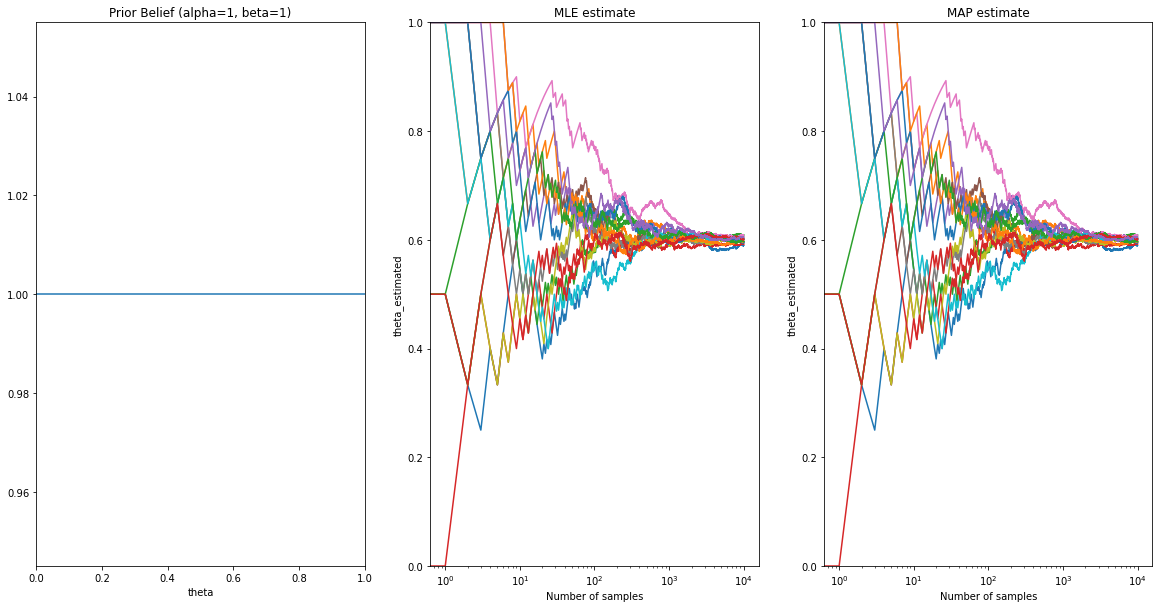

In [17]:
theta                          = 0.6
total_experiments              = 15
total_tosses                   = 10000
hallucinated_heads             = 0
hallucinated_tails             = 0
simulate_experiment(theta, total_experiments, total_tosses, hallucinated_heads, hallucinated_tails)

# 1Head, 1Tail Hallucination
With this hallucination, model will believe that likely chances of theta is ~0.5 and hence MAP will have less extreme values

Prior belief of P(heads) is  0.5


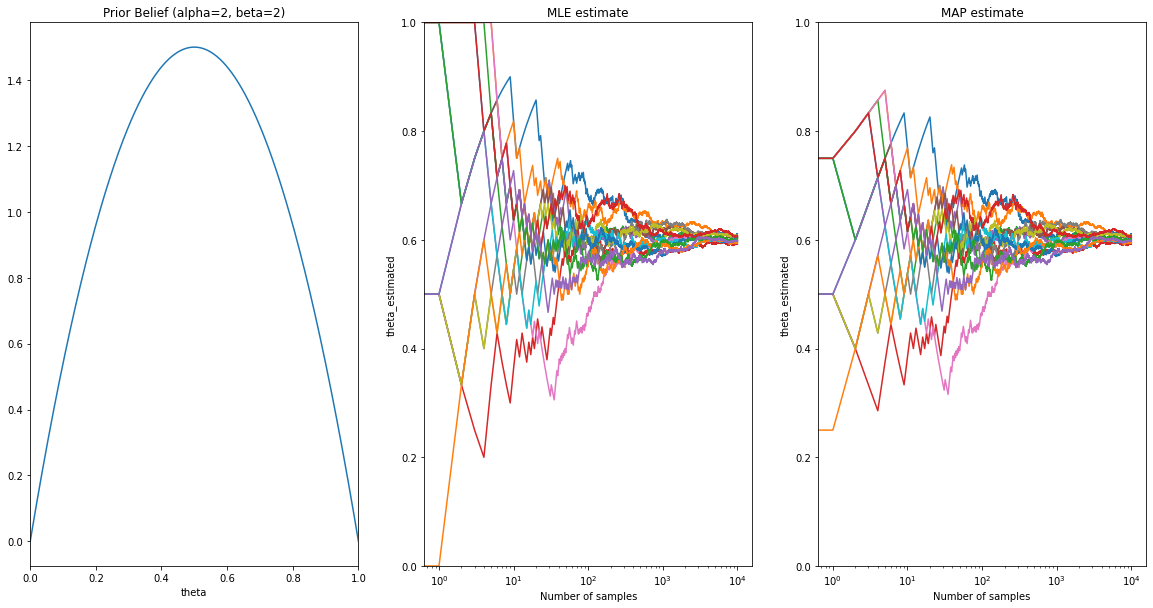

In [18]:
theta                          = 0.6
total_experiments              = 15
total_tosses                   = 10000
hallucinated_heads             = 1
hallucinated_tails             = 1
simulate_experiment(theta, total_experiments, total_tosses, hallucinated_heads, hallucinated_tails)

# 10 Head, 10 Tail: A little strong belief of coin having 0.5 P(head)
Here belief sticks to 0.5 for a while in MAP estimate

Prior belief of P(heads) is  0.5


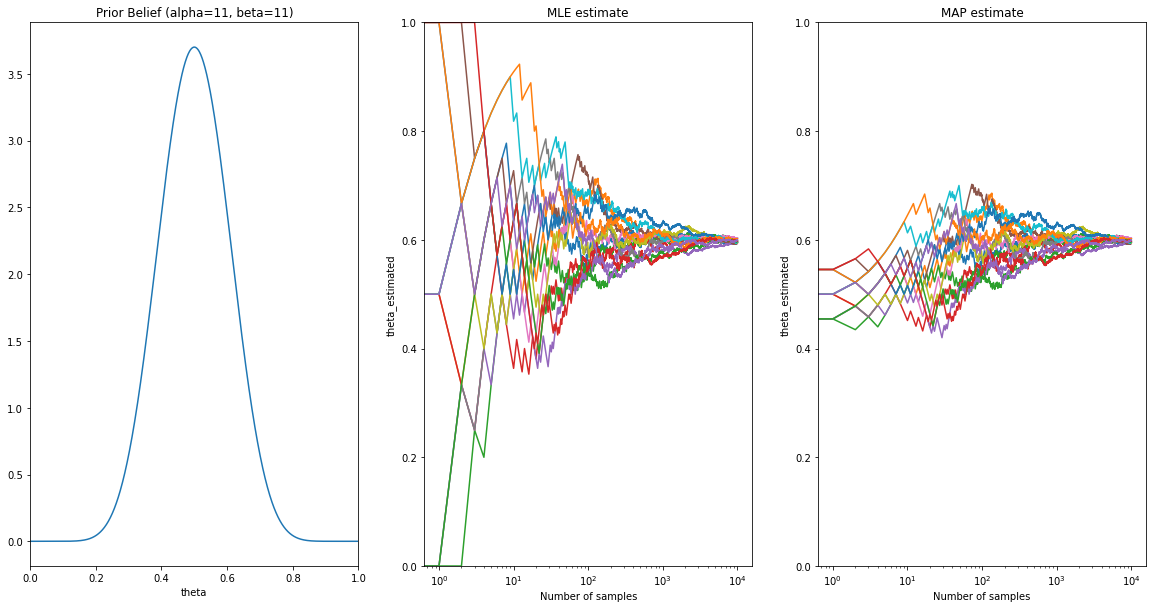

In [20]:
theta                          = 0.6
total_experiments              = 15
total_tosses                   = 10000 
hallucinated_heads             = 10
hallucinated_tails             = 10
simulate_experiment(theta, total_experiments, total_tosses, hallucinated_heads, hallucinated_tails)

# 100H, 100T hallucination
MAP estimation is very-very confident that estimate is 0.5 and need to see a lot of data to get right estimate

Prior belief of P(heads) is  0.5


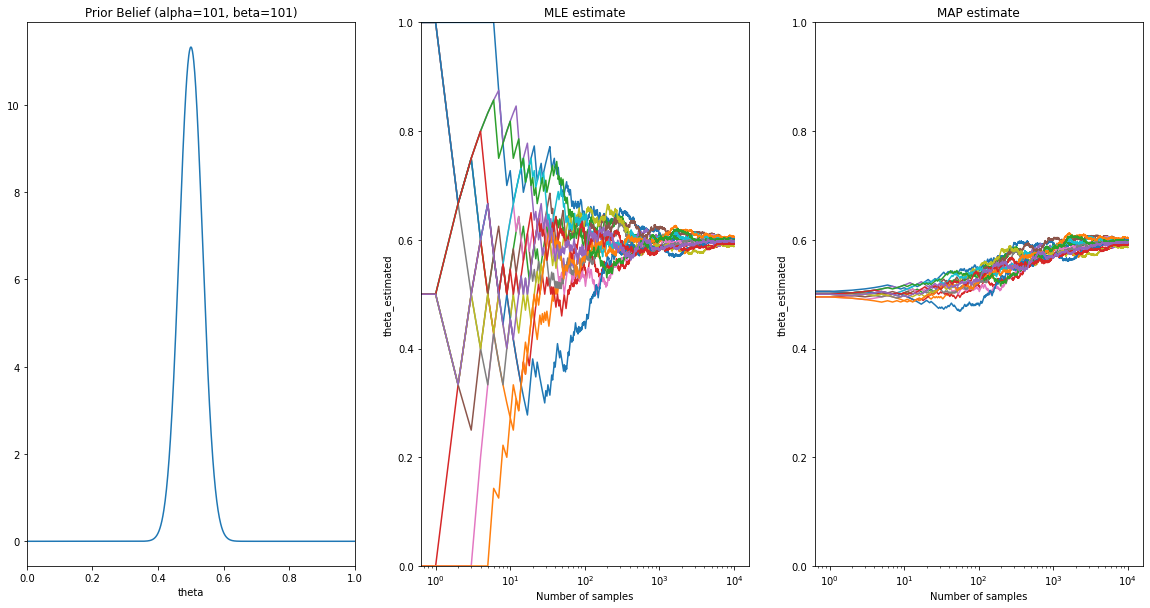

In [21]:
theta                          = 0.6
total_experiments              = 15
total_tosses                   = 10000 
hallucinated_heads             = 100
hallucinated_tails             = 100
simulate_experiment(theta, total_experiments, total_tosses, hallucinated_heads, hallucinated_tails)

# Right belief

Prior belief of P(heads) is  0.6


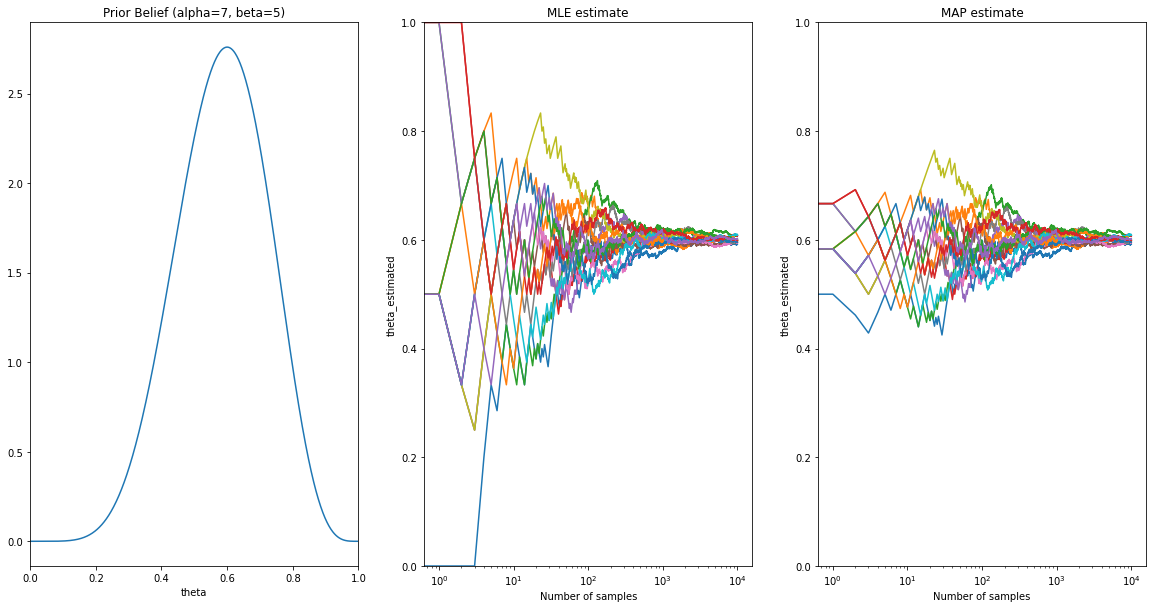

In [23]:
theta                          = 0.6
total_experiments              = 15
total_tosses                   = 10000 
hallucinated_heads             = 6
hallucinated_tails             = 4
simulate_experiment(theta, total_experiments, total_tosses, hallucinated_heads, hallucinated_tails)

# Confident right belief

Prior belief of P(heads) is  0.6


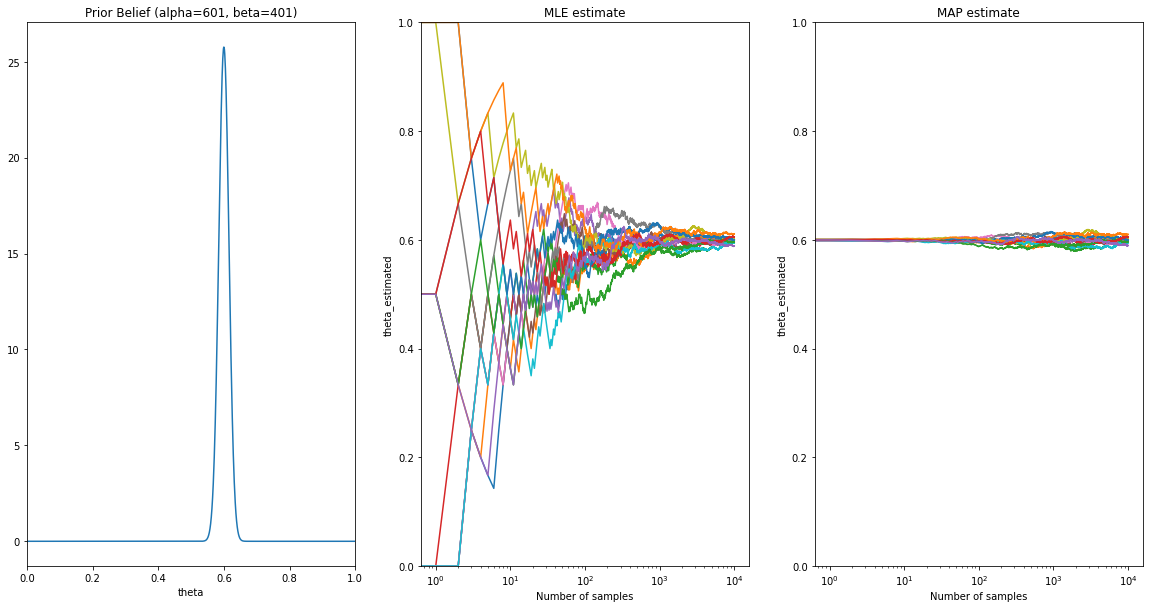

In [25]:
theta                          = 0.6
total_experiments              = 15
total_tosses                   = 10000 
hallucinated_heads             = 600
hallucinated_tails             = 400
simulate_experiment(theta, total_experiments, total_tosses, hallucinated_heads, hallucinated_tails)